In [1]:
import pandas as pd
from MPNETopic import MPNETopic
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import cv2
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from tqdm import tqdm
from string import punctuation

In [2]:
#load dataframe of news articles
text_df = pd.read_csv('./news_articles.csv')

stop_words = ENGLISH_STOP_WORDS

In [3]:
def clean_text(text):
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    text = [word for word in text if word not in [char for char in punctuation]]
    text = ' '.join(text)
    return text

In [4]:
text_df['title_clean'] = [clean_text(txt) for txt in tqdm(text_df['title'])]

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 40739.31it/s]


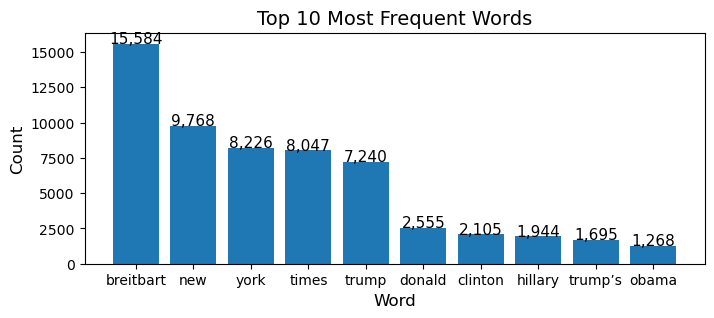

In [5]:
#word count frequency
word_counts = text_df['title_clean'].apply(lambda text: text.lower().split()).explode().value_counts()
plt.figure(figsize=(8, 3))
plt.bar(word_counts.index[:10], word_counts.values[:10])
plt.xlabel('Word', size=12)
plt.ylabel('Count', size=12)
plt.title('Top 10 Most Frequent Words', size=14)

for idx, val in enumerate(word_counts[:10]):
    plt.text(idx, val, f"{val:,}", ha='center', size=11)
plt.show()

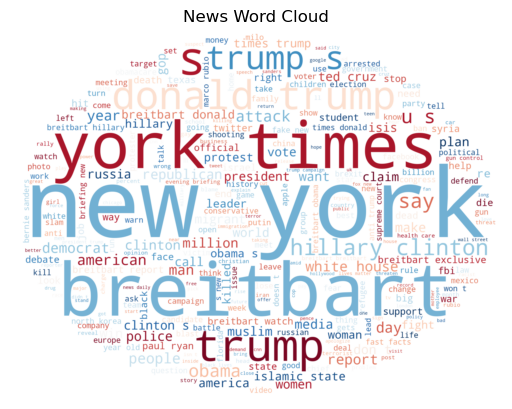

In [6]:
im = cv2.imread('circle.jpg')
im = ~cv2.resize(im, (2160, 1620))

all_text = ' '.join(text_df['title_clean'])

# plt.figure(figsize=(10, 4))
wc = WordCloud(mask=im, colormap='RdBu', background_color='white',
               max_words=300, max_font_size=800, random_state=42)
wc.generate(all_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('News Word Cloud', size=12)
plt.show()

Average title word length: 59



Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

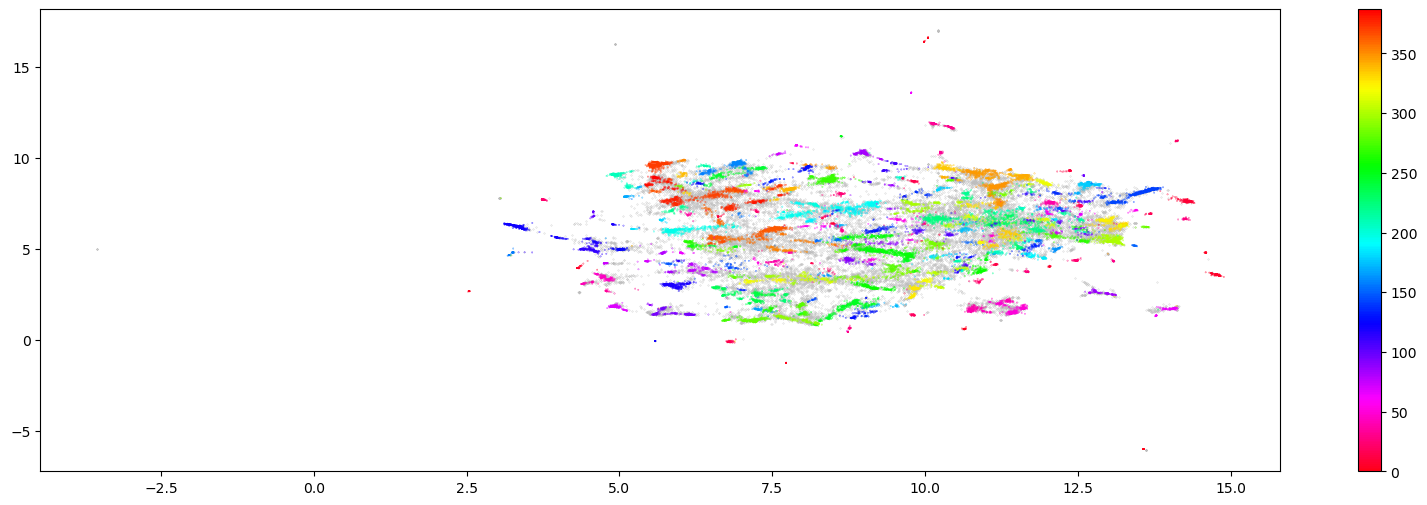

Initial Topic Amount: 389
Final Topic Amount: 389



In [7]:
column='title_clean'

topic_model = MPNETopic(text_df, column)
topic_df, topics = topic_model.create_topic_model()

In [8]:
for topic in topics:
    print(topic)
    print(', '.join([tup[0] for tup in topics[topic]][:4]))
    print('\n')

-1
breitbart, new, trump, york


0
2017, 10, cnn, march


1
2017, 10, cnn, 26


2
student, cnn, 2016, news


3
cuban, mark, trump, donald


4
puerto, rico, statehood, debt


5
castro, cuba, fidel, cuban


6
brazil, impeachment, rousseff, dilma


7
phyllis, schlafly, conservative, 92


8
christie, bridge, scandal, york


9
parenthood, abortion, planned, pro


10
genital, mutilation, female, fgm


11
gambia, africa, election, south


12
krauthammer, breitbart, trump, obama


13
moore, michael, trump, dems


14
facts, fast, hastert, dennis


15
nuclear, option, bn, breitbart


16
kristol, candidate, party, breitbart


17
commutes, sentences, obama, offenders


18
manning, chelsea, sentence, obama


19
gawker, hogan, hulk, univision


20
biden, joe, beau, breitbart


21
duterte, philippines, rodrigo, philippine


22
ali, muhammad, mayweather, ufc


23
palin, sarah, breitbart, trump


24
venezuela, venezuelan, maduro, venezuelans


25
soros, george, financed, group


26
maher, breitbart, tr